# New section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/vehicles.csv")

# Display the first few rows of the dataset
df.head()

# Basic info about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/vehicles.csv'

# Since the file has a .csv extension, use read_csv instead of read_excel
df = pd.read_csv(file_path)

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/vehicles.csv")
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
df.shape

(426880, 26)

In [ ]:
# check null values
df.isnull().sum()

,0
id,0
url,0
region,0
region_url,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678


In [ ]:
# check what every column have
for col in df.columns:
    print( col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

id : 426880
id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
Name: count, dtype: int64

********************

url : 426880
url
https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html            1
https://nh.craigslist.org/cto/d/troy-1998-dodge-ram-59-cummins/7313139418.html             1
https://nh.craigslist.org/ctd/d/north-hampton-2012-hyundai-sante-fe-se/7313423023.html     1
https://nh.craigslist.org/ctd/d/derry-2008-chrysler-sebring-limited-all/7313423324.html    1
https://nh.craigslist.org/ctd/d/derry-2002-toyota-camry-low-miles/7313424533.html          1
Name: count, dtype: int64

********************

region : 404
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
Name: count, dtype: int64

********************

region_url : 413
region_url
https://spokane.craigslist.org    2988
https://eugene.craigslist.org

1.Which car brand has the highest average price?
2.What is the most common car type in the dataset?
3.How does mileage affect the price of a car?
4.Are there regional differences in car prices?
5.Which features (e.g., fuel type, transmission) significantly influence price?
6.What is the price distribution for cars of different manufacturing years?

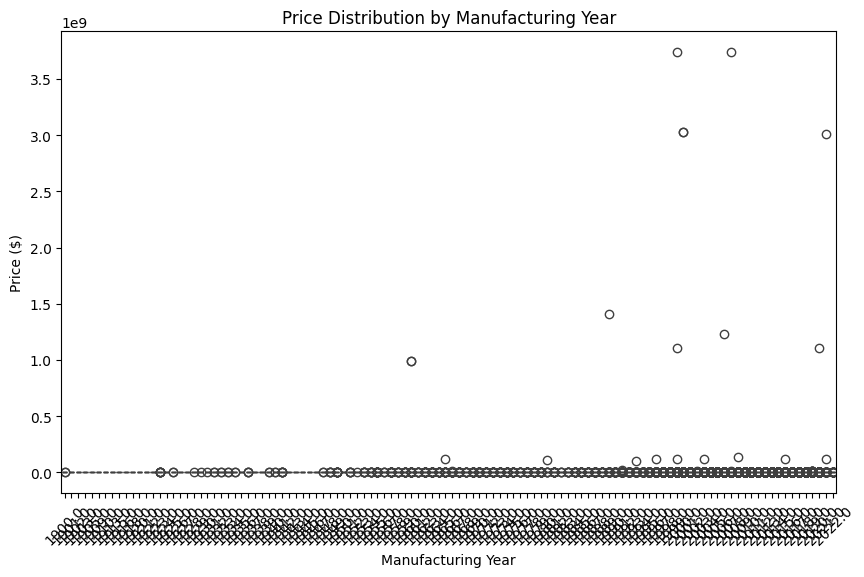

In [ ]:
# Box plot to show price distribution by manufacturing year
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='price')
plt.title('Price Distribution by Manufacturing Year')  # Set the title
plt.xlabel('Manufacturing Year')  # Label for x-axis
plt.ylabel('Price ($)')  # Label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()


In [ ]:
# Calculate the average price for each fuel type
fuel_avg_price = df.groupby('fuel_type')['price'].mean()

# Plot a bar chart for average price by fuel type
fuel_avg_price.plot(kind='bar', color='green', figsize=(8, 6))
plt.title('Average Price by Fuel Type')  # Set the title
plt.xlabel('Fuel Type')  # Label for x-axis
plt.ylabel('Average Price')  # Label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()


KeyError: 'fuel_type'

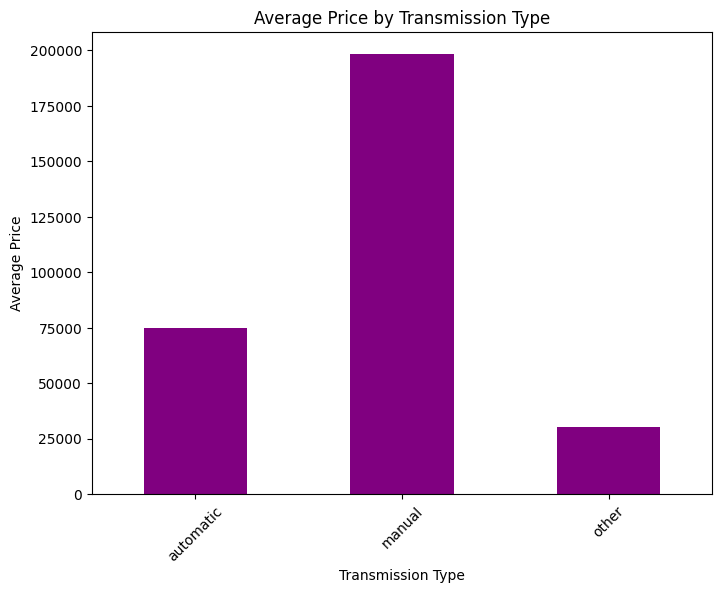

In [ ]:
# Calculate the average price for each transmission type
transmission_avg_price = df.groupby('transmission')['price'].mean()

# Plot a bar chart for average price by transmission type
transmission_avg_price.plot(kind='bar', color='purple', figsize=(8, 6))
plt.title('Average Price by Transmission Type')  # Set the title
plt.xlabel('Transmission Type')  # Label for x-axis
plt.ylabel('Average Price')  # Label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()


region
frederick              4.914334e+06
delaware               3.205056e+06
humboldt county        2.902730e+06
modesto                1.401324e+06
knoxville              1.369993e+06
                           ...     
sioux city             9.649819e+03
southeast IA           9.624103e+03
klamath falls          9.550169e+03
west virginia (old)    9.423750e+03
siskiyou county        8.293855e+03
Name: price, Length: 404, dtype: float64


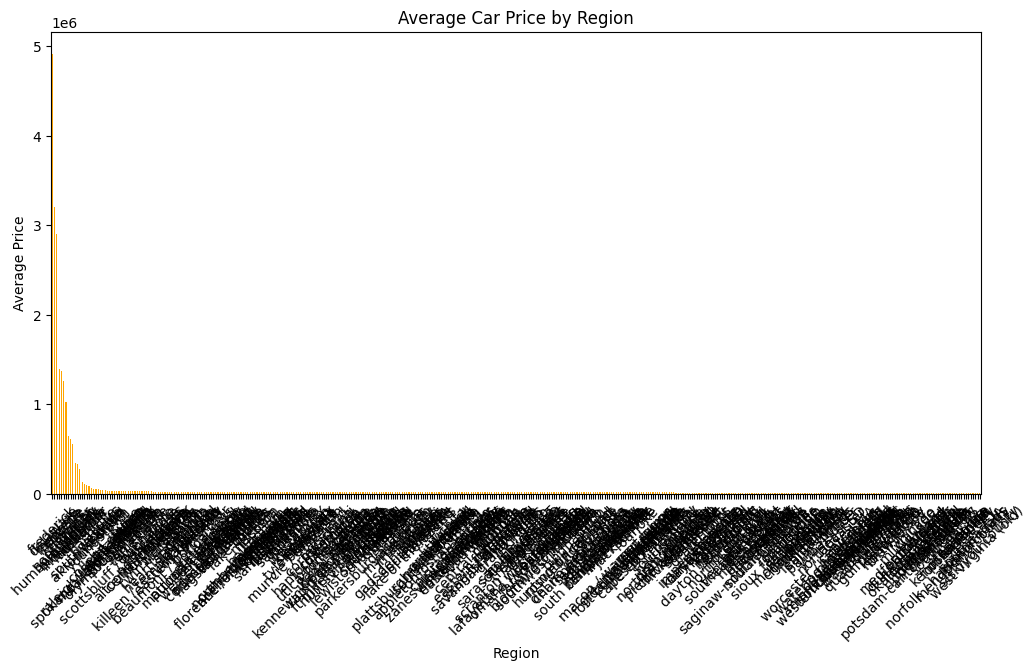

In [ ]:
# Calculate the average price for each region
region_avg_price = df.groupby('region')['price'].mean().sort_values(ascending=False)

# Display the results
print(region_avg_price)

# Plot a bar chart for average car price by region
region_avg_price.plot(kind='bar', color='orange', figsize=(12, 6))
plt.title('Average Car Price by Region')  # Set the title
plt.xlabel('Region')  # Label for x-axis
plt.ylabel('Average Price')  # Label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()


In [ ]:
# Scatter plot to show the relationship between mileage and price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.5)
plt.title('Effect of Mileage on Car Price')  # Set the title
plt.xlabel('Mileage (km)')  # Label for x-axis
plt.ylabel('Price ($)')  # Label for y-axis
plt.show()


ValueError: Could not interpret value `mileage` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Count the number of cars for each car type
car_type_counts = df['car_type'].value_counts()

# Display the results
print(car_type_counts)

# Plot a pie chart to show the distribution of car types
car_type_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of Car Types')  # Set the title
plt.ylabel('')  # Remove y-axis label for cleaner visualization
plt.show()


KeyError: 'car_type'

In [ ]:
# Calculate the average price for each car brand
brand_avg_price = df.groupby('brand')['price'].mean().sort_values(ascending=False)

# Display the results
print(brand_avg_price)

# Plot a bar chart for the top 10 brands with the highest average price
brand_avg_price.head(10).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Brands with Highest Average Price')  # Set the title
plt.xlabel('Brand')  # Label for x-axis
plt.ylabel('Average Price')  # Label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()


KeyError: 'brand'

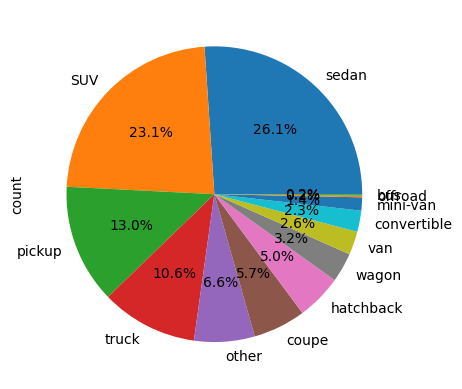

In [ ]:
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%');

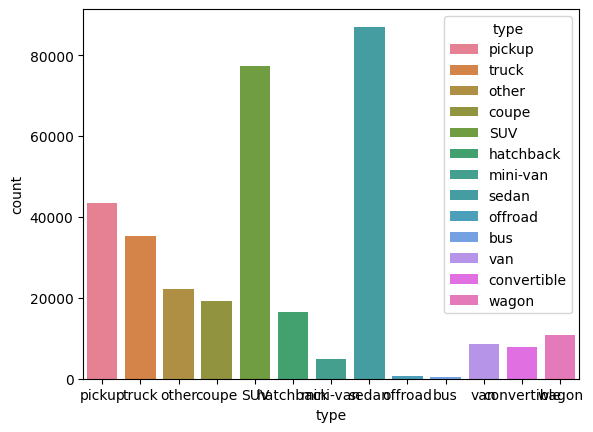

In [ ]:
sns.countplot(x= 'type' , data =df , hue= 'type');
